<img src="https://cdn.arstechnica.net/wp-content/uploads/2020/07/pokemon-go-masks-800x450.jpg">

In this hands-on, we are going to use a fun dataset to plot the relationships between different observations of the combat statistics of Pokémon. You will need to import a few packages, including `pandas`, `matplotlib.pyplot`, and `seaborn`. The data is stored in a csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

`

Here are the descriptions of this dataset:
- `#` - Pokedex entry number of the Pokemon
- `Name` - name of the Pokemon
- `Type 1` - each Pokemon has a type, this determines weakness/resistance to attacks [referred to as the primary type]
- `Type 2` - some Pokemon are dual type and have 2 [referred to as the secondary type]
- `Total` - sum of all stats that come after this, a general guide to how strong a Pokemon is
- `HP` - hit points, or health, defines how much damage a Pokemon can withstand before fainting
- `Attack` - the base modifier for normal attacks
- `Defense` - the base damage resistance against normal attacks
- `Sp. Atk` - special attack, the base modifier for special attacks
- `Sp. Def` - the base damage resistance against special attacks
- `Speed` - determines which Pokemon attacks first each round
- `Generation` - refers to which grouping/game series the Pokemon was released in
- `Legendary` - a boolean that identifies whether the Pokemon is legendary

### Initial exploring
First let's take this dataset and do some initial exploring such as looking at the different columns and their datatype, looking at the header, evaluating the dimensions.

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
pok = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv')
pok.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [34]:
## What is a quick way to get some information on the dataset such as datatype and dimension?
pok.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [35]:
## Missing data. While there does not seem to be any missing data, what is a way you can check if there any missing values in the dataset?
## How would you handle them?
pok.isnull().sum()

,0
#,0
Name,0
Type 1,0
Type 2,386
Total,0
HP,0
Attack,0
Defense,0
Sp. Atk,0
Sp. Def,0


## Let's practice some basic data exploration
Answer the following questions below

In [36]:
## How many Pokémon are there in total?
pokemon = len(pok)
print(pokemon)

800


In [37]:
## What is the average HP (Hit Points) of all Pokémon?
pokHP = pok['HP'].mean()
print(pokHP)

69.25875


In [38]:
## Which Pokémon has the highest Attack stat?
pokAttack = pok['Attack'].max()
print(pokAttack)

190


In [39]:
## Find the strongest Pokémon based on their Total stat (sum of all base stats).
pokTotal = pok['Total'].max()
print(pokTotal)

780


In [40]:
## What are the top 5 Pokémon with the highest total stats?
pokTotal = pok.sort_values(by='Total', ascending=False)
pokTotal.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
164,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
422,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
424,383,GroudonPrimal Groudon,Ground,Fire,770,100,180,160,150,90,90,3,True


In [41]:
## Q: Which Pokémon types are most common across the Type I?
pokType1 = pok['Type 1'].value_counts()
print(pokType1)
print("The most common type across Type I Pokémon is Water")

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64
The most common type across Type I Pokémon is Water


In [42]:
print(pok)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

In [52]:
## Are there any Pokémon that have both 'Type 1' and 'Type 2' being the same? How do you filter them?
pokType1_2 = pok[pok['Type 1'] == pok['Type 2']]
print(pokType1_2)
print("There are no Pokémon with both Type 1 and Type 2's being the same")

Empty DataFrame
Columns: [#, Name, Type 1, Type 2, Total, HP, Attack, Defense, Sp. Atk, Sp. Def, Speed, Generation, Legendary]
Index: []
There are no Pokémon with both Type 1 and Type 2's being the same


## How can we do further exploration and data manipulation?

In [53]:
## How would you categorize Pokémon based on their 'Speed' stat? (Consider creating a 'Speed category' column, where you have speed=0-50 is slow, speed=51-100 is average, and speed>101 is fast)
pok['Speed Category'] = pd.cut(pok['Speed'], bins=[0, 50, 100, float('inf')], labels=['Slow', 'Average', 'Fast'])
print(pok)

       #                   Name   Type 1  Type 2  Total  HP  Attack  Defense  \
0      1              Bulbasaur    Grass  Poison    318  45      49       49   
1      2                Ivysaur    Grass  Poison    405  60      62       63   
2      3               Venusaur    Grass  Poison    525  80      82       83   
3      3  VenusaurMega Venusaur    Grass  Poison    625  80     100      123   
4      4             Charmander     Fire     NaN    309  39      52       43   
..   ...                    ...      ...     ...    ...  ..     ...      ...   
795  719                Diancie     Rock   Fairy    600  50     100      150   
796  719    DiancieMega Diancie     Rock   Fairy    700  50     160      110   
797  720    HoopaHoopa Confined  Psychic   Ghost    600  80     110       60   
798  720     HoopaHoopa Unbound  Psychic    Dark    680  80     160       60   
799  721              Volcanion     Fire   Water    600  80     110      120   

     Sp. Atk  Sp. Def  Speed  Generatio

## Now let's practice with some plotting.

Type 1
Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Rock         44
Electric     44
Ground       32
Ghost        32
Dragon       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: count, dtype: int64


<ipython-input-62-b183a21a4070>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=pok, x='Type 1', order=pok['Type 1'].value_counts().index, hue=None, palette='Set2');


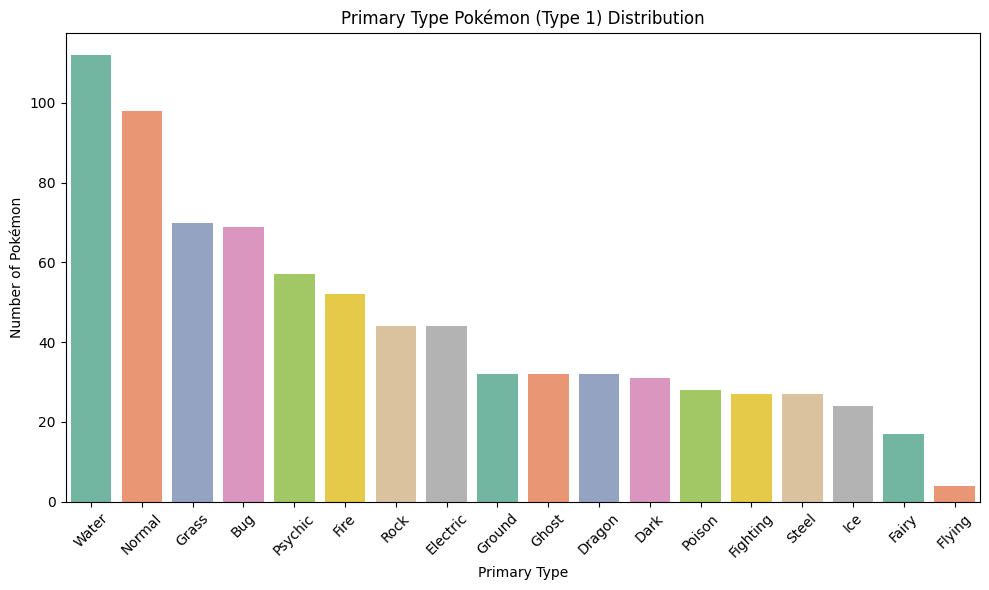

In [62]:
## What is the distribution of Pokémon by their primary type ('Type 1')? (Visualize this)
pokDist = pok['Type 1'].value_counts()
print(pokDist)

plt.figure(figsize=(10, 6));
sns.countplot(data=pok, x='Type 1', order=pok['Type 1'].value_counts().index, hue=None, palette='Set2');
plt.title('Primary Type Pokémon (Type 1) Distribution');
plt.xlabel('Primary Type');
plt.ylabel('Number of Pokémon');
plt.xticks(rotation=45);
plt.tight_layout();
plt.show();

<Figure size 1000x600 with 0 Axes>

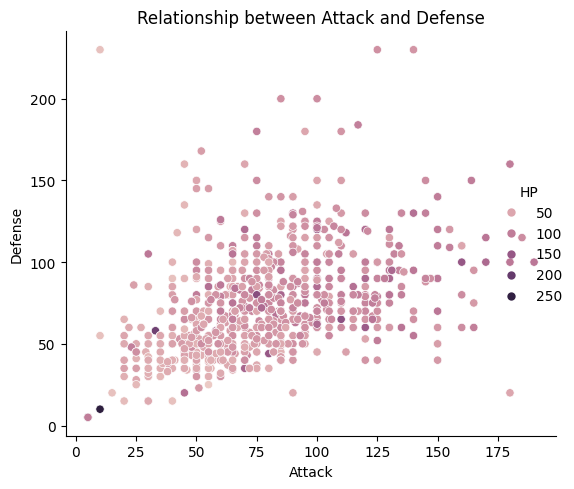

In [67]:
## Plot the relationship between Attack and Defense
## Create a relationship plot using seaborn's `relplot` function. Plot `Attack` on the x-axis and `Defense` on the y-axis. Use `hue` to display the `HP` (hit point) for each datapoint.
pokAttack = pok['Attack']
pokDefense = pok['Defense']
pokHP = pok['HP']

plt.figure(figsize=(10, 6));
sns.relplot(x=pokAttack, y=pokDefense, hue=pokHP, data=pok, kind='scatter');
plt.title('Relationship between Attack and Defense');
plt.xlabel('Attack');
plt.ylabel('Defense');
plt.tight_layout();
plt.show()

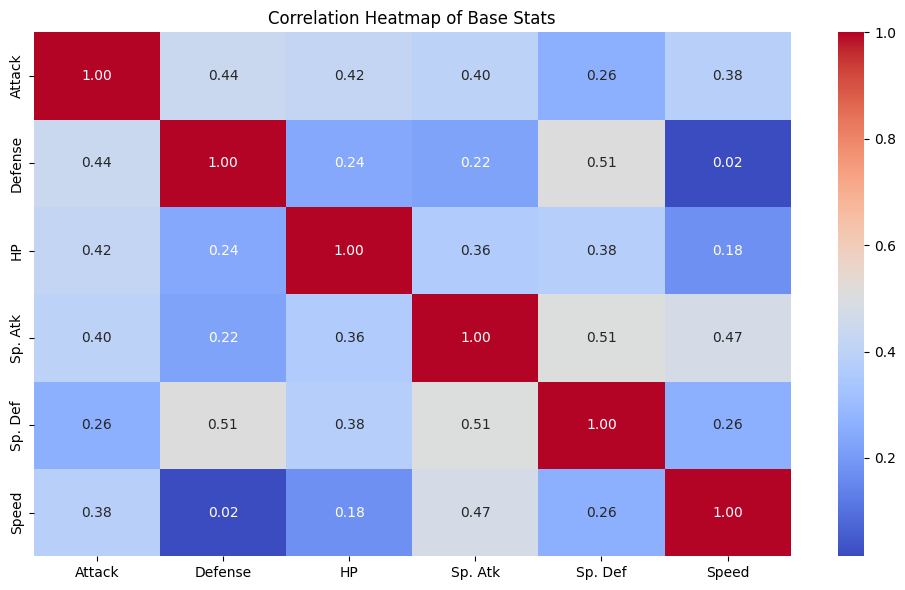

In [69]:
## What is the correlation between the various base stats (e.g., Attack vs. Defense)? Visualize this correlation.
## You can use a heatmap to visualize this sns.heatmap
pokCorr = pok[['Attack', 'Defense', 'HP', 'Sp. Atk', 'Sp. Def', 'Speed']].corr()

plt.figure(figsize=(10, 6));
sns.heatmap(pokCorr, annot=True, cmap='coolwarm', fmt=".2f");
plt.title('Correlation Heatmap of Base Stats');
plt.tight_layout();
plt.show()

From the plot, I observed....

<Figure size 1000x600 with 0 Axes>

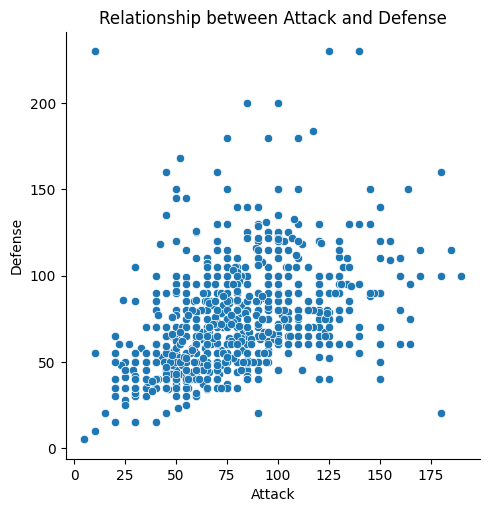

In [70]:
## What is the relationship between 'Attack' and 'Defense'? Are there any Pokémon with unusually high or low values?
## You can use a relplot or scatterplot (sns)
pokAttack = pok['Attack']
pokDefense = pok['Defense']

plt.figure(figsize=(10, 6));
sns.relplot(x=pokAttack, y=pokDefense, data=pok, kind='scatter');
plt.title('Relationship between Attack and Defense');
plt.xlabel('Attack');
plt.ylabel('Defense');